In [ ]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 27.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors, Crippen

def load_smiles_dataset(file_path):
    """
    Load SMILES dataset from an Excel (XLSX) file.
    Returns a pandas DataFrame containing SMILES strings.
    """
    try:
        data = pd.read_csv(file_path)
        return data
    except Exception as e:
        print("Error loading Excel file:", e)
        return None

def check_toxicity_safety_profiles(smiles):
    """
    Check if a molecule represented by the given SMILES string meets toxicity and safety profiles.
    Returns True if the molecule meets the profiles, False otherwise.
    """
    molecule = Chem.MolFromSmiles(smiles)
    if molecule is None:
        print("Error: Invalid SMILES string.")
        return False

    meets_profiles = True

    # Check for Lipinski's Rule of Five
    #if not Lipinski.RuleOfFive(molecule):
     #   meets_profiles = False
      #  print("Does not meet Lipinski's Rule of Five.")

    # Check for molecular weight
    mol_weight = Descriptors.MolWt(molecule)
    if mol_weight > 1000:
        meets_profiles = False
        print("Molecular weight exceeds 1000 daltons.")

    # Check for LogP
    logP = Crippen.MolLogP(molecule)
    if logP > 5:
        meets_profiles = False
        print("LogP exceeds 5.")

    # Check for polar surface area
    polar_surface_area = Descriptors.TPSA(molecule)
    if polar_surface_area > 140:
        meets_profiles = False
        print("Polar surface area exceeds 140 Å^2.")

    # Check for number of rotatable bonds
    num_rotatable_bonds = Descriptors.NumRotatableBonds(molecule)
    if num_rotatable_bonds > 10:
        meets_profiles = False
        print("Number of rotatable bonds exceeds 10.")

    # You can add more criteria as needed

    return meets_profiles

# Example usage:
file_path = "smiles_DrugBank 1.csv"  # Path to your Excel (XLSX) file containing SMILES dataset
smiles_data = load_smiles_dataset(file_path)

if smiles_data is not None:
    for smiles in smiles_data["SMILES"]:
        print("Checking molecule with SMILES:", smiles)
        meets_toxicity_safety_profiles = check_toxicity_safety_profiles(smiles)
        print("Meets toxicity and safety profiles:", meets_toxicity_safety_profiles)
        print("--------------------")
else:
    print("Failed to load SMILES dataset.")


Streaming output truncated to the last 5000 lines.
Checking molecule with SMILES: COCOc1ccc(C(=O)C=C2c3ccccc3C(=O)c3c(OC)cccc32)cc1
Meets toxicity and safety profiles: True
--------------------
Checking molecule with SMILES: O=C(Nc1ccc(N2CCOCC2)cc1N1CCOCC1)c1ccco1
Meets toxicity and safety profiles: True
--------------------
Checking molecule with SMILES: Cc1ncc([N+](=O)[O-])n1Cc1cccc(CNc2nc(N)n3nc(-c4ccco4)nc3n2)c1
Polar surface area exceeds 140 Å^2.
Meets toxicity and safety profiles: False
--------------------
Checking molecule with SMILES: COC(=O)c1cccc(NC(=O)c2cccnc2)c1
Meets toxicity and safety profiles: True
--------------------
Checking molecule with SMILES: CC1C(n2[nH]c3ncccc32)c2cc(C#N)ccc2OC1(C)C
Meets toxicity and safety profiles: True
--------------------
Checking molecule with SMILES: OCC1OC(n2cnc3c(NCc4cccc(I)c4)nc(Cl)nc32)C(O)C1O
Meets toxicity and safety profiles: True
--------------------
Checking molecule with SMILES: O=C(O)CC(NC(=O)OCc1ccccc1)C(=O)CON1C(=O)CC1c1cccc

In [ ]:
# Initialize counters
true_count = 0
false_count = 0

if smiles_data is not None:
    for smiles in smiles_data["SMILES"]:  # Ensure this matches your column name
        print("Checking molecule with SMILES:", smiles)
        meets_toxicity_safety_profiles = check_toxicity_safety_profiles(smiles)
        print("Meets toxicity and safety profiles:", meets_toxicity_safety_profiles)
        print("--------------------")

        # Increment counters based on the outcome
        if meets_toxicity_safety_profiles:
            true_count += 1
        else:
            false_count += 1
else:
    print("Failed to load SMILES dataset.")

# Print the counts
print(f"Number of molecules meeting toxicity and safety profiles: {true_count}")
print(f"Number of molecules not meeting toxicity and safety profiles: {false_count}")



Streaming output truncated to the last 5000 lines.
--------------------
Checking molecule with SMILES: O=C(Nc1ccc(N2CCOCC2)cc1N1CCOCC1)c1ccco1
Meets toxicity and safety profiles: True
--------------------
Checking molecule with SMILES: Cc1ncc([N+](=O)[O-])n1Cc1cccc(CNc2nc(N)n3nc(-c4ccco4)nc3n2)c1
Polar surface area exceeds 140 Å^2.
Meets toxicity and safety profiles: False
--------------------
Checking molecule with SMILES: COC(=O)c1cccc(NC(=O)c2cccnc2)c1
Meets toxicity and safety profiles: True
--------------------
Checking molecule with SMILES: CC1C(n2[nH]c3ncccc32)c2cc(C#N)ccc2OC1(C)C
Meets toxicity and safety profiles: True
--------------------
Checking molecule with SMILES: OCC1OC(n2cnc3c(NCc4cccc(I)c4)nc(Cl)nc32)C(O)C1O
Meets toxicity and safety profiles: True
--------------------
Checking molecule with SMILES: O=C(O)CC(NC(=O)OCc1ccccc1)C(=O)CON1C(=O)CC1c1ccccc1
Meets toxicity and safety profiles: True
--------------------
Checking molecule with SMILES: N=C(N)Nc1cccc(-n2nccc2-c2c

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Crippen, Descriptors, Lipinski

def load_smiles_dataset(file_path):
    """
    Load SMILES dataset from an Excel file.
    Returns a pandas DataFrame containing SMILES strings.
    """
    try:
        data = pd.read_csv(file_path)
        return data
    except Exception as e:
        print("Error loading Excel file:", e)
        return None

def check_adme_criteria(smiles):
    """
    Check if a molecule represented by the given SMILES string meets ADME criteria.
    Returns True if the molecule meets the criteria, False otherwise.
    """
    molecule = Chem.MolFromSmiles(smiles)
    if molecule is None:
        print("Error: Invalid SMILES string.")
        return False

    meets_criteria = True

    # Lipinski's Rule of Five
    #if not Lipinski.RuleOfFive(molecule):
     #   meets_criteria = False
     #   print("Does not meet Lipinski's Rule of Five.")

    # Veber's Rule
    num_rotatable_bonds = Descriptors.NumRotatableBonds(molecule)
    num_hydrogen_bond_donors = Lipinski.NumHDonors(molecule)
    if num_rotatable_bonds > 10 or num_hydrogen_bond_donors > 10:
        meets_criteria = False
        print("Does not meet Veber's Rule.")

    # Ghose Filter
    mol_weight = Descriptors.MolWt(molecule)
    logP = Crippen.MolLogP(molecule)
    num_atoms = molecule.GetNumAtoms()
    num_rotatable_bonds = Descriptors.NumRotatableBonds(molecule)
    if not (160 <= mol_weight <= 480 and -0.4 <= logP <= 5.6 and 20 <= num_atoms <= 70 and 0 <= num_rotatable_bonds <= 10):
        meets_criteria = False
        print("Does not meet Ghose Filter.")

    # Egan's Rules
    polar_surface_area = Descriptors.TPSA(molecule)
    num_hydrogen_bond_acceptors = Lipinski.NumHAcceptors(molecule)
    if not (mol_weight < 500 and logP < 5 and polar_surface_area < 140 and num_hydrogen_bond_acceptors < 10):
        meets_criteria = False
        print("Does not meet Egan's Rules.")

    return meets_criteria

# Example usage:
file_path = "smiles_Transformer.csv"  # Path to your Excel (XLSX) file containing SMILES dataset
smiles_data = load_smiles_dataset(file_path)

if smiles_data is not None:
    for smiles in smiles_data["SMILES"]:
        print("Checking molecule with SMILES:", smiles)
        meets_adme_criteria = check_adme_criteria(smiles)
        print("Meets ADME criteria:", meets_adme_criteria)
        print("--------------------")
else:
    print("Failed to load SMILES dataset.")


Streaming output truncated to the last 5000 lines.
Does not meet Ghose Filter.
Does not meet Egan's Rules.
Meets ADME criteria: False
--------------------
Checking molecule with SMILES: O=C(Cc1ccc(NC(=S)N2CCOCC2)o1)C12CCC(CC1)CC2
Meets ADME criteria: True
--------------------
Checking molecule with SMILES: Cc1ccccc1Nc1nc(-c2ccccc2Cl)cs1
Does not meet Egan's Rules.
Meets ADME criteria: False
--------------------
Checking molecule with SMILES: NC1CNc2nc3c4cccc(COc5cccnc5)c4nc(n3n2)NC1=O
Meets ADME criteria: True
--------------------
Checking molecule with SMILES: CN(Cc1csnn1)C(=O)NC(NC(=O)C1CC1)C(=O)NCCc1cccc(Oc2cc(C(F)(F)F)ccn2)c1
Does not meet Veber's Rule.
Does not meet Ghose Filter.
Does not meet Egan's Rules.
Meets ADME criteria: False
--------------------
Checking molecule with SMILES: CCNC(=S)NC(=O)c1ccccc1CC(=O)c1ccco1
Meets ADME criteria: True
--------------------
Checking molecule with SMILES: CCc1cccc2cc(C(=O)OC)c(=N)oc12
Does not meet Ghose Filter.
Meets ADME criteria: False


In [ ]:
# Initialize counters
true_count = 0
false_count = 0

if smiles_data is not None:
    for smiles in smiles_data["SMILES"]:  # Ensure this matches your column name
        print("Checking molecule with SMILES:", smiles)
        meets_adme_criteria = check_adme_criteria(smiles)
        print("Meets ADME criteria:", meets_adme_criteria)
        print("--------------------")

        # Increment counters based on the outcome
        if meets_adme_criteria:
            true_count += 1
        else:
            false_count += 1
else:
    print("Failed to load SMILES dataset.")

# Print the counts
print(f"Number of molecules meeting ADME criteria: {true_count}")
print(f"Number of molecules not meeting ADME criteria: {false_count}")


Streaming output truncated to the last 5000 lines.
Meets ADME criteria: False
--------------------
Checking molecule with SMILES: O=C(Cc1ccc(NC(=S)N2CCOCC2)o1)C12CCC(CC1)CC2
Meets ADME criteria: True
--------------------
Checking molecule with SMILES: Cc1ccccc1Nc1nc(-c2ccccc2Cl)cs1
Does not meet Egan's Rules.
Meets ADME criteria: False
--------------------
Checking molecule with SMILES: NC1CNc2nc3c4cccc(COc5cccnc5)c4nc(n3n2)NC1=O
Meets ADME criteria: True
--------------------
Checking molecule with SMILES: CN(Cc1csnn1)C(=O)NC(NC(=O)C1CC1)C(=O)NCCc1cccc(Oc2cc(C(F)(F)F)ccn2)c1
Does not meet Veber's Rule.
Does not meet Ghose Filter.
Does not meet Egan's Rules.
Meets ADME criteria: False
--------------------
Checking molecule with SMILES: CCNC(=S)NC(=O)c1ccccc1CC(=O)c1ccco1
Meets ADME criteria: True
--------------------
Checking molecule with SMILES: CCc1cccc2cc(C(=O)OC)c(=N)oc12
Does not meet Ghose Filter.
Meets ADME criteria: False
--------------------
Checking molecule with SMILES: COC(

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Lipinski

# Function to load SMILES dataset from Excel file
def load_smiles_dataset(file_path):
    """
    Load SMILES dataset from an Excel file.
    Returns a pandas DataFrame containing SMILES strings.
    """
    try:
        data = pd.read_csv(file_path)
        return data
    except Exception as e:
        print("Error loading Excel file:", e)
        return None

# Function to check Lipinski's Rule of Five
def check_lipinski_rule(smiles):
    """
    Check if a molecule represented by the given SMILES string meets Lipinski's Rule of Five.
    Returns True if the molecule meets the rule, False otherwise.
    """
    molecule = Chem.MolFromSmiles(smiles)
    if molecule is None:
        print("Error: Invalid SMILES string.")
        return False

    violations = 0

    # Molecular weight should be less than 500 daltons
    if Chem.Descriptors.MolWt(molecule) > 500:
        violations += 1

    # Octanol-water partition coefficient (logP) should be less than 5
    if Chem.Crippen.MolLogP(molecule) > 5:
        violations += 1

    # Hydrogen bond donors should be less than or equal to 5
    if Lipinski.NumHDonors(molecule) > 5:
        violations += 1

    # Hydrogen bond acceptors should be less than or equal to 10
    if Lipinski.NumHAcceptors(molecule) > 10:
        violations += 1

    # Return True if no violations, False otherwise
    return violations == 0

# Example usage:
file_path = "smiles_Transformer.csv"  # Path to your Excel (XLSX) file containing SMILES dataset
smiles_data = load_smiles_dataset(file_path)

if smiles_data is not None:
    # Check Lipinski's Rule of Five for each molecule in the dataset
    for smiles in smiles_data["SMILES"]:
        meets_lipinski_rule = check_lipinski_rule(smiles)
        print("SMILES:", smiles, "Meets Lipinski's Rule of Five:", meets_lipinski_rule)
else:
    print("Failed to load SMILES dataset.")



Streaming output truncated to the last 5000 lines.
SMILES: Cn1cc(-c2ccc(C(=O)N3CCN(c4ccc(-n5cncn5)c(F)c4)CC3)o2)cn1 Meets Lipinski's Rule of Five: True
SMILES: Cc1ccc(CN2CC=C(C(=O)OCCCCCOCc3ccc(C#N)cc3)C2)cc1 Meets Lipinski's Rule of Five: True
SMILES: CC(=O)Nc1ccc(C(=O)O)c2nc(Oc3ccc(F)cc3)sc12 Meets Lipinski's Rule of Five: True
SMILES: O=C(c1coc(CC2CC2)c1)N1CCOCC1 Meets Lipinski's Rule of Five: True
SMILES: CC(=O)NC(Cc1ccccc1)C(=O)NC(CCCN)C(=O)N1CCCCC1C(=O)OC(C)(C)C Meets Lipinski's Rule of Five: True
SMILES: CC(C)C(NC(=O)C(N)CCCOCc1ccccc1)C(=O)NC(CCCNC(=N)N)C(=O)c1nccs1 Meets Lipinski's Rule of Five: False
SMILES: N=C(c1ccc(C(=O)NCc2cnn(-c3ccc(Cl)cc3)n2)cc1)N1CCCC1 Meets Lipinski's Rule of Five: True
SMILES: CN(C)N1Cc2ccc(c(-c3ccco3)c2)-c2nc3nc1nc(N)n3n2 Meets Lipinski's Rule of Five: True
SMILES: O=C(c1ccc(Cl)cc1)n1c(CCN2CCOCC2)cc2c(=O)cc(N3CCOCC3)oc21 Meets Lipinski's Rule of Five: True
SMILES: COC(=O)c1ccccc1S(=O)(=O)n1cccn1 Meets Lipinski's Rule of Five: True
SMILES: CS(=O)(=O)c

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Lipinski

# Your existing functions here...

# Example usage:
file_path = "smiles_Transformer.csv"  # Ensure the file name and extension are correct
smiles_data = load_smiles_dataset(file_path)

# Initialize counters
meets_count = 0
violations_count = 0

if smiles_data is not None:
    # Iterate through each molecule in the dataset and check Lipinski's Rule of Five
    for smiles in smiles_data["SMILES"]:
        meets_lipinski_rule = check_lipinski_rule(smiles)

        # Increment the appropriate counter based on whether the rule is met
        if meets_lipinski_rule:
            meets_count += 1
        else:
            violations_count += 1

    # Print the summary
    print(f"Number of molecules meeting Lipinski's Rule of Five: {meets_count}")
    print(f"Number of molecules violating Lipinski's Rule of Five: {violations_count}")
else:
    print("Failed to load SMILES dataset.")



Number of molecules meeting Lipinski's Rule of Five: 7172
Number of molecules violating Lipinski's Rule of Five: 2828


In [ ]:
!pip install rdkit
!pip install scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 24.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib  # For saving the model
import os

# Function to calculate molecular descriptors
def generate_features(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:  # Check if the molecule object is None
        return [None, None, None, None]  # Return a list of Nones or an alternative error value
    features = []
    features.append(Descriptors.MolWt(mol))
    features.append(Descriptors.MolLogP(mol))
    features.append(Descriptors.NumHDonors(mol))
    features.append(Descriptors.NumHAcceptors(mol))
    return features

# Load your dataset
data = pd.read_csv('train_II.csv')

# Extract SMILES strings from the 'Id' column
data['Id'] = data['Id'].apply(lambda x: x.split(';')[0])

# Generate features using the extracted SMILES strings
data['Features'] = data['Id'].apply(generate_features)

# Debug: Inspect input data and generated features
print("Input data info after processing:")
print(data.info())
print("First few rows with generated features:")
print(data[['Id', 'Features', 'Expected']].head())

# Prepare data for model
X = list(data['Features'])
y = data['Expected']
# Convert the features from lists of features to a format suitable for sklearn models
# Note: This involves handling None values. Here, they're replaced with 0. Adjust as needed.
X = [feature if feature != [None, None, None, None] else [0, 0, 0, 0] for feature in data['Features']]
y = data['Expected'].map({1: 0, 2: 1})  # Map labels to 0 (toxic) and 1 (not toxic) for binary classification

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on test set and evaluate
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Model Accuracy: {accuracy:.2f}')

# Define the model filename
model_filename = 'random_forest_classifier.joblib'
# create a subdirectory to store models
model_directory = 'models'
# Ensure the directory exists
os.makedirs(model_directory, exist_ok=True)
# Define the model path using os.path.join for cross-platform compatibility
model_path = os.path.join(model_directory, model_filename)

# Save the model to disk
joblib.dump(clf, model_path)
print(f'Model saved to {model_path}')

[18:54:34] Explicit valence for atom # 1 Si, 8, is greater than permitted
[18:54:44] Explicit valence for atom # 1 Si, 8, is greater than permitted
[18:54:52] Explicit valence for atom # 1 Si, 8, is greater than permitted
[18:54:55] Explicit valence for atom # 1 Si, 8, is greater than permitted
[18:55:02] Explicit valence for atom # 1 Si, 8, is greater than permitted
[18:55:08] Explicit valence for atom # 1 Si, 8, is greater than permitted


Input data info after processing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75383 entries, 0 to 75382
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        75383 non-null  object
 1   Expected  75383 non-null  int64 
 2   Features  75383 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
First few rows with generated features:
                                           Id  \
0  C1=CC(=CC=C1C(C2=CC=C(C=C2)O)C(Cl)(Cl)Cl)O   
1                              CCCCCCCCC(=O)C   
2        CCCCCCCCCC[N+](C)(C)CCCCCCCCCC.[Cl-]   
3   C1CN(C(=N1)N[N+](=O)[O-])CC2=CN=C(C=C2)Cl   
4                                  [Na+].[I-]   

                                       Features  Expected  
0           [317.599, 4.5999000000000025, 2, 2]         2  
1           [156.269, 3.3260000000000023, 0, 1]         2  
2  [362.0860000000001, 4.348200000000004, 0, 0]         2  
3           [255.665, 0.68789999999999

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,predictions)
print(f1)

0.9214871553997904


In [ ]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.85673542, 0.85375075, 0.85600584, 0.85427169, 0.85665959])

In [ ]:
import numpy as np
X = np.array(X)
clf = RandomForestClassifier(random_state=42)
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_micro')
print(f"Cross-validation F1 scores: {scores}")
print(f"Average F1 score: {np.mean(scores)}")


Cross-validation F1 scores: [0.85673542 0.85375075 0.85600584 0.85427169 0.85665959]
Average F1 score: 0.8554846578401738


In [ ]:
from collections import Counter

# Assuming y is your label vector
class_distribution = Counter(y)
print(class_distribution)

# Identifying majority and minority classes
majority_class = max(class_distribution, key=class_distribution.get)
minority_class = min(class_distribution, key=class_distribution.get)
print(f"Majority class: {majority_class} with {class_distribution[majority_class]} samples")
print(f"Minority class: {minority_class} with {class_distribution[minority_class]} samples")


Counter({1: 64725, 0: 10658})
Majority class: 1 with 64725 samples
Minority class: 0 with 10658 samples


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Calculate additional performance metrics
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Generate and display a confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)


Precision: 0.87
Recall: 0.99
F1 Score: 0.92
Confusion Matrix:
[[  152  1985]
 [  188 12752]]


In [ ]:
pip install matplotlib seaborn


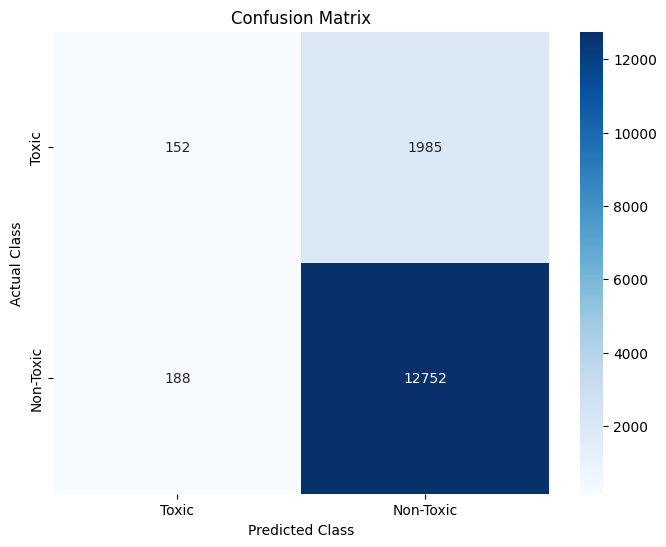

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your confusion matrix data
conf_matrix = [[152, 1985],
               [188, 12752]]

# Setting up the labels for the matrix
labels = ['Toxic', 'Non-Toxic']

# Creating the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()


In [ ]:
import pandas as pd
import joblib
from rdkit import Chem
from rdkit.Chem import Descriptors

# Assuming generate_features is defined as before

def predict_toxicity(data):
    # Load the model
    model = joblib.load(model_path)

    # Generate features using the extracted SMILES strings
    data['Features'] = data['SMILES'].apply(generate_features)

    # Prepare features for prediction
    X = [feature if feature != [None, None, None, None] else [0, 0, 0, 0] for feature in data['Features']]

    # Make predictions
    predictions = model.predict(X)

    # Add predictions to the dataframe
    data['Predicted_Toxicity'] = predictions

    return data


In [ ]:
# Load the dataset containing SMILES strings
dataset_path = 'smiles_Transformer.csv'
data = pd.read_csv(dataset_path)

# Define the path to your saved model
model_path = '/content/models/random_forest_classifier.joblib'
#'/content/models/random_forest_classifier.joblib'

# Call the function to make predictions on the dataset
predicted_data = predict_toxicity(data)

# Inspect the first few rows to verify predictions
print(predicted_data.head())

# save the DataFrame with predictions to a CSV file for further evaluation
predicted_data.to_csv('smiles_TransformerPrediction.csv', index=False)


                                              SMILES  \
0         COc1ccc(F)c(Nc2nc3c(OC)cccc3c3nc(N)nn23)n1   
1   CN(C)c1ccc(-n2cnc3c(NCC4OC(CO)C(O)C4O)ncnc32)cc1   
2  Cc1nc(N2CCCC(NC3CCC(C#N)CC3)C2)sc1C=C(c1ccccc1...   
3  CCCCOC(=O)C1=Cc2ccc(cc2)OC(=O)c2sc1c1c2C(=O)C(...   
4   CN1CCN(C(=O)Nc2nc3nn(C)cc3c3nc(-c4ccco4)nn23)CC1   

                                         Features  Predicted_Toxicity  
0               [355.3330000000001, 2.1546, 2, 9]                   1  
1          [400.439, -0.22510000000000008, 4, 10]                   1  
2    [555.7770000000003, 6.268100000000006, 2, 9]                   1  
3    [515.6310000000002, 6.143300000000006, 0, 7]                   1  
4  [381.40000000000015, 1.0502999999999993, 1, 9]                   1  


In [ ]:
# Assuming 'predicted_data' is your DataFrame that includes the 'Predicted_Toxicity' column
toxicity_counts = predicted_data['Predicted_Toxicity'].value_counts()
# 1 is number of non-toxic compounds
# 0 is number of toxic compounds
# Print the counts
print(toxicity_counts)


1    9981
0      19
Name: Predicted_Toxicity, dtype: int64


In [ ]:
num_samples = data.shape[0]
print(f"Total number of samples in the dataset: {num_samples}")


Total number of samples in the dataset: 10000


In [ ]:
df = pd.DataFrame({
    'SMILES': ['O=C(CCOCCN1CCN(C2CC(c3ccc(Cl)cc3)C2)CC1)NCc1ccc(F)cc1', 'COc1ccccc1C1=NOC(c2ccccc2F)C1', 'Cc1nc(N)c2sc3c(c2n1)CCCC3']  # Example SMILES strings
})

model_path = '/content/models/random_forest_classifier.joblib'

predicted_data = predict_toxicity(df, model_path)
print(predicted_data)


                                              SMILES  \
0  O=C(CCOCCN1CCN(C2CC(c3ccc(Cl)cc3)C2)CC1)NCc1cc...   
1                      COc1ccccc1C1=NOC(c2ccccc2F)C1   
2                          Cc1nc(N)c2sc3c(c2n1)CCCC3   

                                         Features  Predicted_Toxicity  
0   [474.02000000000027, 4.065800000000003, 1, 4]                   1  
1   [271.29100000000005, 3.700000000000003, 0, 3]                   1  
2  [219.31299999999993, 2.4607200000000002, 1, 4]                   1  


In [ ]:
# Check data types of all columns
print(combined_df.dtypes)

# Convert numeric columns to numeric data type
numeric_cols = combined_df.select_dtypes(include=["int", "float"]).columns
combined_df[numeric_cols] = combined_df[numeric_cols].apply(pd.to_numeric, errors="coerce")


SMILES                object
Features              object
Predicted_Toxicity     int64
Dataset                int64
dtype: object


In [ ]:
# Clean the 'Features' column
combined_df['Features'] = combined_df['Features'].str.replace('[', '').str.replace(']', '').str.strip()

# Convert 'Features' column to lists of floats
combined_df['Features'] = combined_df['Features'].apply(lambda x: [float(val) for val in x.split(',') if val.strip()])


NameError: name 'combined_df' is not defined

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


AttributeError: module 'matplotlib.pyplot' has no attribute 'zlabel'

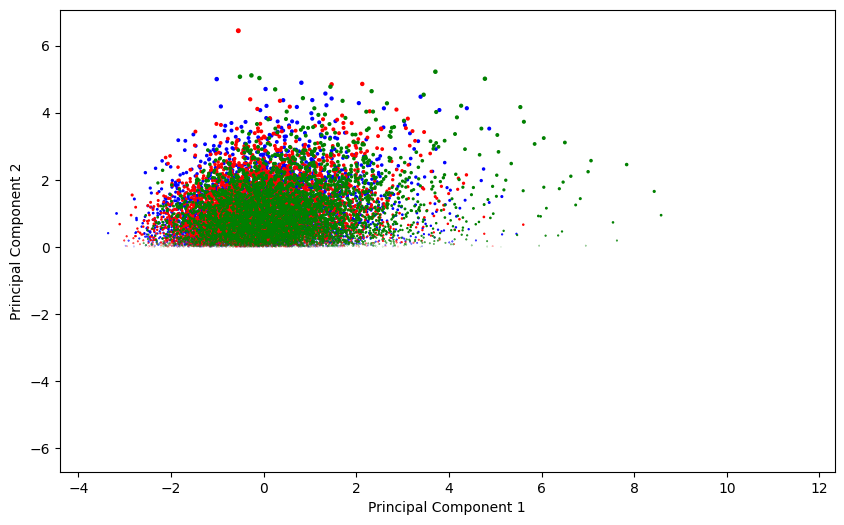

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load datasets
df1 = pd.read_csv("DrugBankPredictions.csv")
df2 = pd.read_csv("smiles 1Prediction.csv")
df3 = pd.read_csv("smiles_TransformerPrediction.csv")

# Add labels to indicate dataset
df1["Dataset"] = 1
df2["Dataset"] = 2
df3["Dataset"] = 3

# Concatenate datasets vertically
combined_df = pd.concat([df1, df2, df3], ignore_index=True)

# Convert 'Features' column to lists of floats
combined_df['Features'] = combined_df['Features'].apply(lambda x: [float(i) for i in x.strip('[]').split(',')])

# Check if all lists in the 'Features' column have the same length
feature_lengths = combined_df['Features'].apply(len)
if not feature_lengths.eq(feature_lengths.iloc[0]).all():
    raise ValueError("Not all lists in the 'Features' column have the same length")

# Convert 'Features' column to a 2D NumPy array
features_array = np.array(combined_df['Features'].tolist())

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_array)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame for the principal components
pc_df = pd.DataFrame(data=principal_components, columns=["PC1", "PC2"])

# Add labels and datasets to the principal components DataFrame
pc_df["Predicted_Toxicity"] = combined_df["Predicted_Toxicity"]
pc_df["Dataset"] = combined_df["Dataset"]

# Plot
plt.figure(figsize=(10, 6))
for dataset, color in zip([1, 2, 3], ["blue", "red", "green"]):
    subset = pc_df[pc_df["Dataset"] == dataset]
    plt.scatter(subset["PC1"], subset["PC2"], subset["PC2"], label=f"Dataset {dataset}", color=color)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.zlabel("Principal Component 3")
plt.title("PCA Plot of Chemicals from Different Datasets")
plt.legend()
plt.grid(True)
plt.show()



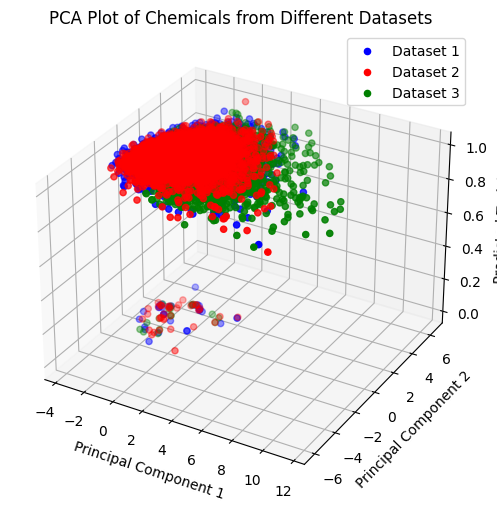

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
for dataset, color in zip([1, 2, 3], ["blue", "red", "green"]):
    subset = pc_df[pc_df["Dataset"] == dataset]
    ax.scatter(subset["PC1"], subset["PC2"], subset["Predicted_Toxicity"], label=f"Dataset {dataset}", color=color)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Predicted Toxicity")
ax.set_title("PCA Plot of Chemicals from Different Datasets")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import sklearn

In [ ]:
print(sklearn.__version__)

1.2.2
